# Author
[Koen Aerts](https://koenaerts.ca/) @ [Mobia Technology Innovations](https://mobia.io)

[myOpenHealth](https://mobia.io/healthcare/)

# Intro
This notebook downloads the entire MIT-BIH Arrhythmia Database, which is publicly available here: https://physionet.org/physiobank/database/mitdb/

It then plots a small sample for a given file and channel. By changing the variables below, you can change which file, channel, and sample you want to plot.

Before you start any machine learning project, getting familiar with and visualizing your data is important. The intend of this notebook is to become familiar with the MIT-BIH data before using it in your machine learning project.

In [1]:
# Change the values below to change your data selection.

FILE=1                # There are 48 files.
CHANNEL=0             # There are 2 channels
SAMPLE_START=114000   # Start of the sample in the file.
SAMPLE_SIZE=4000      # Number of readings (360 per second).

# Initialize
Import dependencies.

Note that you will need to download and install the [mitdb](https://github.com/Nospoko/qrs-tutorial) library. The project contains convenience functions that make it easier to download and read [WFDB](https://physionet.org/physiotools/wfdb.shtml) compatible files.

In [2]:
!pip install tqdm
!pip install wfdb

In [2]:
import wfdb as wf
import numpy as np
from datasets import mitdb as dm
from matplotlib import pyplot as plt

# Load File
Pick one of the MIT-BIH files and load it.

In [3]:
# Get available data files.
dbfiles = dm.get_records()
print('Total files: ', len(dbfiles))

# Pick a file.
datfile = dbfiles[FILE]
print('Loading file:', datfile)

# Read the file.
record = wf.rdsamp(datfile)
annotation = wf.rdann(datfile, 'atr')

# Info about the data.
print('Sampling frequency:', record[1].get('fs'))
print('Data shape:', record[0].shape)
print('Annotations:', len(annotation.num))

Total files:  48
Loading file: data/mitdb\101
Sampling frequency: 360
Data shape: (650000, 2)
Annotations: 1874


# Plot
Visualize the selected data. Heatbeat data and associated annotations are displayed.

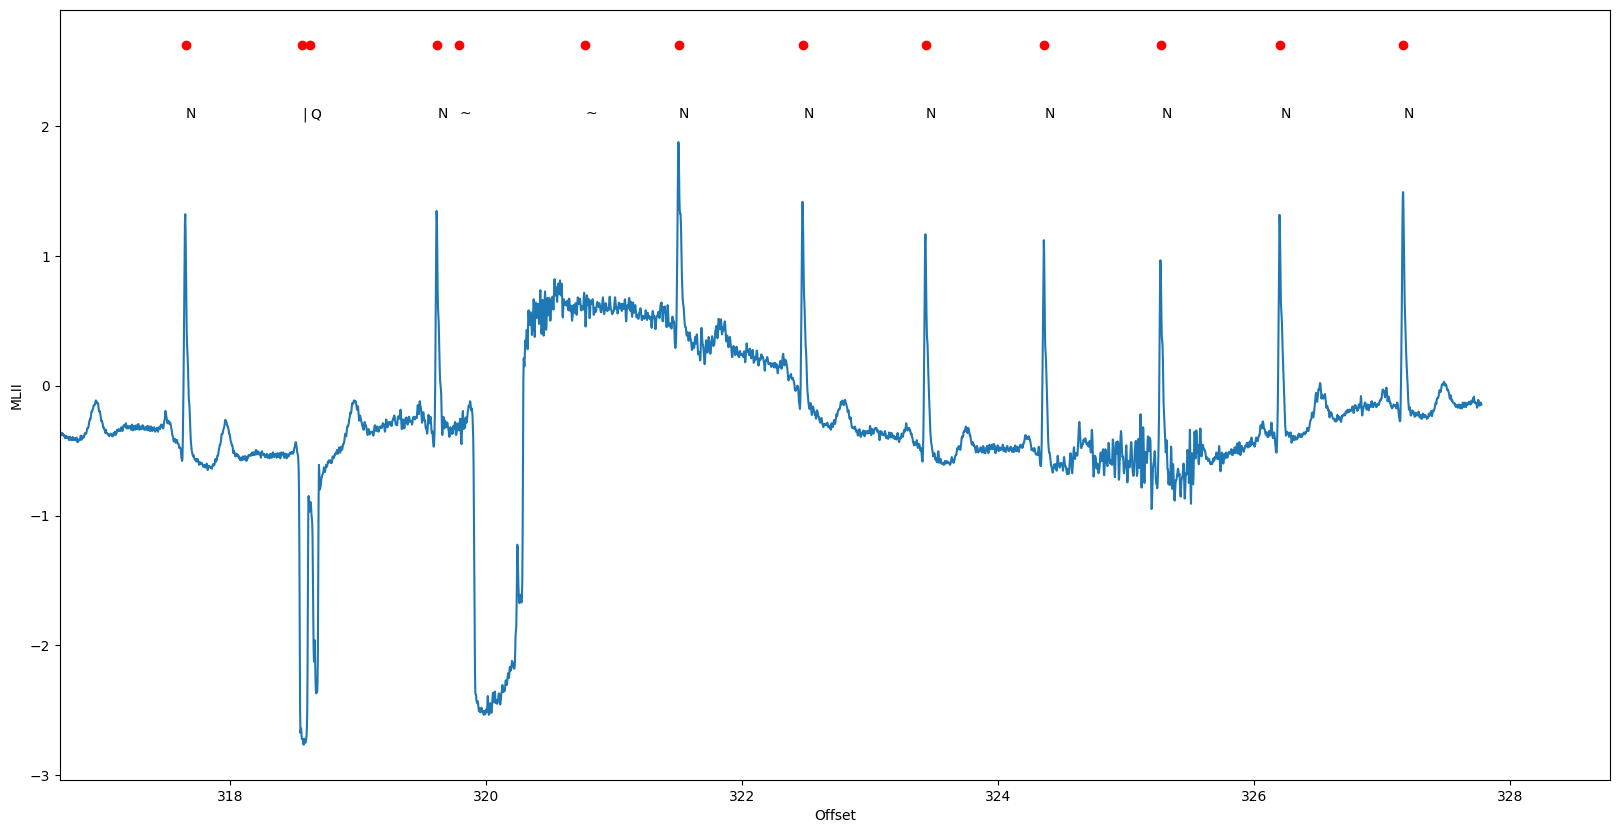

In [4]:
record = wf.rdsamp(datfile)
annotation = wf.rdann(datfile, 'atr')

# Get data and annotations for the samples selected below.
sample_end = SAMPLE_START + SAMPLE_SIZE
channel = record[0][SAMPLE_START:sample_end, CHANNEL]

# Plot the heart beats. Time scale is number of readings
# divided by sampling frequency.
times = (np.arange(SAMPLE_SIZE, dtype = 'float') + SAMPLE_START) / record[1].get('fs')
plt.figure(figsize=(20,10))
plt.plot(times, channel)

# Extract annotations.
where = np.logical_and(annotation.sample >= SAMPLE_START, annotation.sample < sample_end)
annots = annotation.sample[where] - SAMPLE_START
annotypes = np.array(annotation.symbol)
annotypes = annotypes[where]

# Plot the Annotations.
annotimes = times[annots]
plt.plot(annotimes, np.ones_like(annotimes) * channel.max() * 1.4, 'ro')

# Annotation codes.
for idx, annot in enumerate(annots):
    plt.annotate(annotypes[idx], xy = (times[annot], channel.max() * 1.1))

plt.xlim([SAMPLE_START / record[1].get('fs'), (sample_end / record[1].get('fs')) + 1])
plt.xlabel('Offset')
plt.ylabel(record[1].get('sig_name')[CHANNEL])
plt.show()